# **genovista**

**A statistical genomics vizulization toolkit**

Comprehensive statistical analysis tools with different visualization for understanding genomic mutation patterns, focusing on the relationships between mutation frequency, substitution rates, and base substitutions.

Install Packages

In [1]:
#!pip install ptitprince # ptitprince package for creating raincloud plots
#!pip install --upgrade ptitprince
!pip install pingouin
!pip install --upgrade pingouin
!pip install seaborn
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 9.7 MB/s eta 0:00:00


In [2]:
#!pip install --upgrade matplotlib seaborn

Import Library

In [3]:
#python -m pip cache purge  # Or use python3 instead of python if needed
#!pip uninstall seaborn matplotlib
#!pip install seaborn matplotlib

In [4]:
!pip install \
  numpy\
  pandas  \
  statsmodels \
  scipy



In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import statsmodels.api as sm

Packages descriptions:
pandas (pd): Used for data manipulation and analysis, especially with DataFrames. \\
NumPy (np): Fundamental for numerical computations using arrays and mathematical functions. \\
Seaborn (sns): Used for creating informative and visually appealing statistical graphics. \\
Pingouin (pg): Provides a range of statistical tests and tools for analysis. \\
Matplotlib (plt): A core library for creating various types of visualizations. \\
scipy.stats (pearsonr): Used specifically to calculate the Pearson correlation coefficient and p-value.

Mount and Load data

In [6]:
from google.colab import drive ## For colab
drive.mount('/content/drive')

Mounted at /content/drive


Read data

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('/content/drive/MyDrive/nibmg/Colab Notebooks/Statistics/Stats2.csv')
df.head(30)

,protein,Frequency,Percentage_substitutions,Substitutions_base
0,3'UTR,0.021,16.15,8.30
1,5'UTR,0.082,65.84,3.40
2,E,0.004,3.73,2.19
3,M,0.022,14.91,2.24
4,N,0.092,52.80,4.21
5,NSP1,0.005,4.35,0.93
6,NSP10,0.003,1.86,0.96
7,NSP12,0.126,73.29,1.36
8,NSP13,0.024,13.04,1.16
9,NSP14,0.027,18.63,1.64


In [9]:
pg.corr(x=df['Frequency'], y=df['Percentage_substitutions'])

,n,r,CI95%,p-val,BF10,power
pearson,27,0.980142,"[0.96, 0.99]",4.361889e-19,4.118e+15,1.0


pg.corr() function to calculate the correlation between two columns. \\
x=df['Frequency']: Selects the 'Frequency' column from df as the first variable for correlation. \\
y=df['Percentage_substitutions']: Selects the 'Percentage_substitutions' column from df as the second variable.

Calculates the square of the correlation coefficient ('r') \\
pc['r']**2 calculates R-squared. It takes the correlation coefficient (r, assumed to be stored in pc['r']) and squares it to determine the proportion of variance in one variable explained by the other.

In [10]:
pc= pg.corr(x=df['Frequency'], y=df['Percentage_substitutions'])

rt= pc['r']**2

Squaring the correlation coefficient (r) gives the coefficient of determination, often denoted as R-squared (R²). R² represents the proportion of the variance in one variable that can be explained by the variance in the other variable. It tells how well the relationship between the two variables can be used to predict the values of one based on the values of the other. \\

For example, if a correlation coefficient (r) of 0.7, then R² would be 0.49 (0.7 * 0.7). This means that 49% of the variance in one variable is explained by the variance in the other variable.

In [11]:
rt

,r
pearson,0.960678


In [12]:
pg.corr(x=df['Frequency'], y=df['Substitutions_base'])

,n,r,CI95%,p-val,BF10,power
pearson,27,0.074266,"[-0.31, 0.44]",0.712766,0.255,0.06528


Result explaination::

n: Sample size used in the correlation calculation. \\
r: Correlation coefficient (0.45 here, indicating a moderate positive correlation). \\
CI95%: 95% confidence interval for the correlation coefficient. \\
r2/adj_r2: R-squared and adjusted R-squared, representing the proportion of variance explained. \\
p-val: p-value; below 0.05 suggests a significant correlation. \\
"BF10" is the Bayes Factor of the test. It directly measures the strength of evidence in favor of initial hypothesis that weight and height are correlated. Since this value is very large, it indicates that there is very strong evidence that the two variables are indeed correlated. \\
power: Statistical power of the test (1 here indicates high confidence). \\


Value of r	Linear Association Between Variables \\
+1	= Complete positive correlation \\
+0.8	= Strong positive correlation \\
+0.6 =	Moderate positive correlation \\
0	= No correlation \\
-0.6 =	Moderate negative correlation \\
-0.8 =	Strong negative correlation \\
-1 =	Complete negative correlation

In [13]:
pc2= pg.corr(x=df['Frequency'], y=df['Substitutions_base'])

rt2= pc2['r']**2
rt2

,r
pearson,0.005515


**Step 1:** Setting the Style and Palette

```
sns.set(style='white', font_scale=1.5)
sns.set_palette('Dark2')
```

**sns.set(style='white', font_scale=1.5):** Sets the overall style of the plot to 'white' for a clean background and scales the font size by 1.5 for better readability.

**sns.set_palette('Dark2'):** Sets the color palette to 'Dark2', providing a set of distinct colors for the plot elements.

**Step 2: Creating the Joint Plot**

```
g = sns.jointplot(x='Frequency', y='Percentage_substitutions', data=df, kind='reg',
                  height=8, ratio=5, color='xkcd:muted blue', line_kws={'linestyle': '--', 'color': 'red'})
```

**sns.jointplot():** Creates the joint plot. \\
**x='Frequency', y='Percentage_substitutions':** Specifies the columns from the DataFrame df to use for the x and y axes of the plot. \\
**data=df:** Indicates the DataFrame containing the data. \\
**kind='reg':** Sets the type of plot to 'reg', which adds a regression line and confidence interval to the scatter plot.
height=8, ratio=5: Controls the size and aspect ratio of the plot. \\
**color='xkcd:muted blue':** Sets the color of the data points. \\
**line_kws={'linestyle': '--', 'color': 'red'}:** Customizes the regression line with a dashed linestyle and red color. \\


**Step 3: Annotating the Plot**

```
g.ax_joint.annotate(f"beta = {g.ax_joint.collections[0].get_offsets()[0][1]:.2f}",
                     xy=(10, 50), size=10, fontstyle='italic', color='red')
```

**g.ax_joint.annotate():** Adds an annotation to the main scatter plot area. \\
**f"beta = {g.ax_joint.collections[0].get_offsets()[0][1]:.2f}":** Formats the annotation text to include the beta coefficient of the regression line.
**xy=(10, 50):** Specifies the position of the annotation on the plot. \\
**size=10, fontstyle='italic', color='red':** Styles the annotation text.

**Step 4: Setting Axis Labels and Title**


```
g.set_axis_labels('Frequency', 'Percentage of Substitutions', fontsize=10)
g.ax_joint.set_title('Frequency vs. Percentage of Substitutions', fontsize=10)
```


**g.set_axis_labels():** Sets the labels for the x and y axes. \\
**g.ax_joint.set_title():** Sets the title of the plot.


**Step 5: Adding a Grid and Correlation Information**




```
plt.grid(True, alpha=0.5)
g.ax_joint.text(0.1, 2, 'r = 0.45, p < .001', fontstyle='italic', size=8)
```




**plt.grid(True, alpha=0.5):** Adds a grid to the plot for better readability.
**g.ax_joint.text():** Adds text to the plot, often used to display correlation information.

**Step 6: Saving the Plot**




```
plt.savefig('myplot.png')
```



**plt.savefig():** Saves the plot to a file named 'myplot.png'.

In [14]:
#!pip install numpy==1.23.5 pandas==1.5.3 seaborn==0.12.2 matplotlib==3.6.3 --force-reinstall


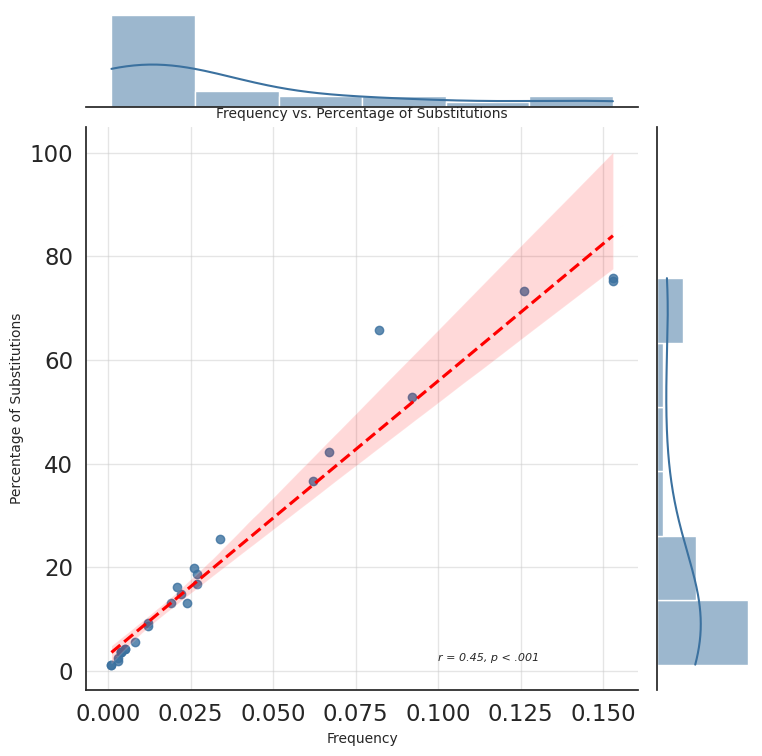

In [15]:
sns.set(style='white', font_scale=1.5)
sns.set_palette('Dark2')

g = sns.jointplot(x='Frequency', y='Percentage_substitutions', data=df, kind='reg',
                  height=8, ratio=5, color='xkcd:muted blue', line_kws={'linestyle': '--', 'color': 'red'})

g.ax_joint.annotate(f"beta = {g.ax_joint.collections[0].get_offsets()[0][1]:.2f}",
                     xy=(10, 50), size=10, fontstyle='italic', color='red')

g.set_axis_labels('Frequency', 'Percentage of Substitutions', fontsize=10)

plt.grid(True, alpha=0.5)
g.ax_joint.set_title('Frequency vs. Percentage of Substitutions', fontsize=10)
g.ax_joint.text(0.1, 2, 'r = 0.45, p < .001', fontstyle='italic', size=8)
plt.savefig('myplot.png')

**Practice 1**

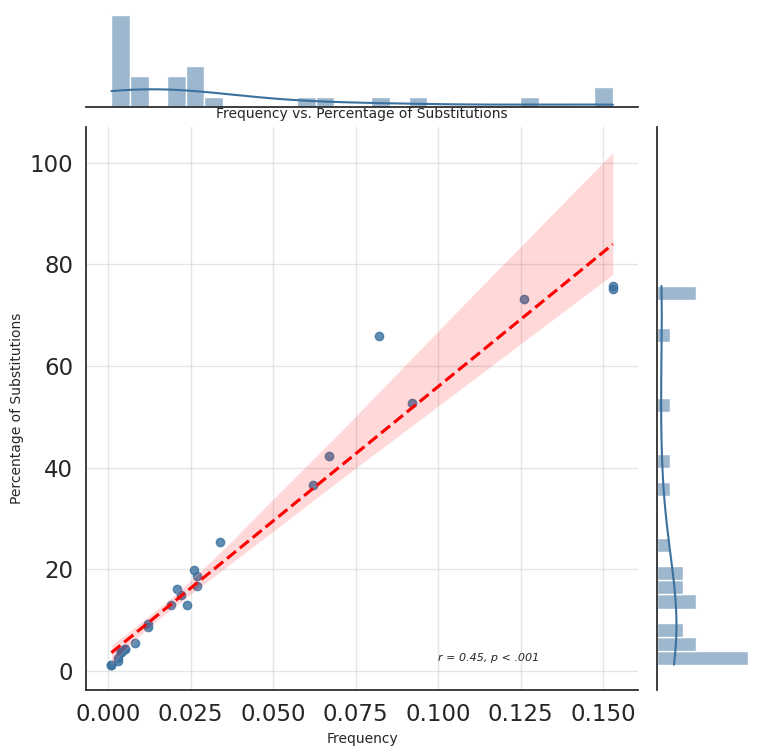

In [16]:

sns.set(style='white', font_scale=1.5)
sns.set_palette('Dark2')

g = sns.jointplot(x='Frequency', y='Percentage_substitutions', data=df, kind='reg',
                  height=8, ratio=5, color='xkcd:muted blue', marginal_kws=dict(bins=27), line_kws={'linestyle': '--', 'color': 'red'})


g.ax_joint.annotate(f"beta = {g.ax_joint.collections[0].get_offsets()[0][1]:.2f}",
                     xy=(10, 50), size=10, fontstyle='italic', color='red')

g.set_axis_labels('Frequency', 'Percentage of Substitutions', fontsize=10)

plt.grid(True, alpha=0.5)
g.ax_joint.set_title('Frequency vs. Percentage of Substitutions', fontsize=10)
g.ax_joint.text(0.1, 2, 'r = 0.45, p < .001', fontstyle='italic', size=8)
plt.savefig('myplot.png')

Practice 1: Joint Plot with Marginal Bins

Custom bin size (27) for marginal histograms
Regression line with dashed style

**Practice 2**

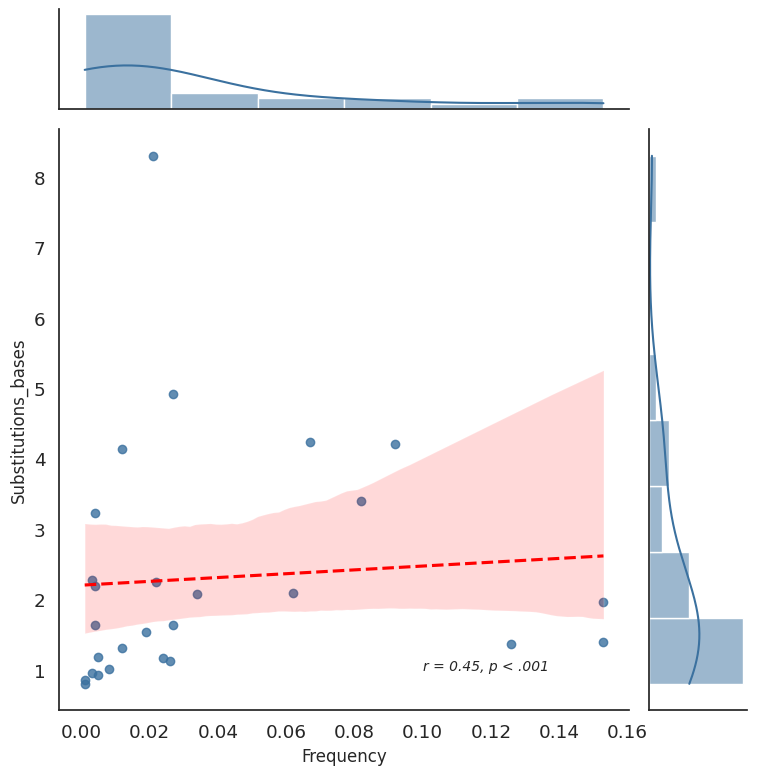

In [17]:

sns.set_style('white', {'grid': False})
sns.set(style='white', font_scale=1.2)
sns.set_palette('Dark2')

g = sns.jointplot(x='Frequency', y='Substitutions_base', data=df, kind='reg',
                  height=8, ratio=5, color='xkcd:muted blue', line_kws={'linestyle': '--', 'color': 'red'})

g.ax_joint.annotate(f"beta = {g.ax_joint.collections[0].get_offsets()[0][1]:.2f}",
                     xy=(10, 50), size=12, fontstyle='italic', color='red')

g.set_axis_labels('Frequency', 'Substitutions_bases', fontsize=12)

sns.despine()
g.ax_joint.text(0.1, 1, 'r = 0.45, p < .001', fontstyle='italic', size=10)

plt.savefig('myplot.png')

Practice 2: Clean Style Joint Plot

No grid background
Analyzing Frequency vs. Substitutions_base

**Practice 3**

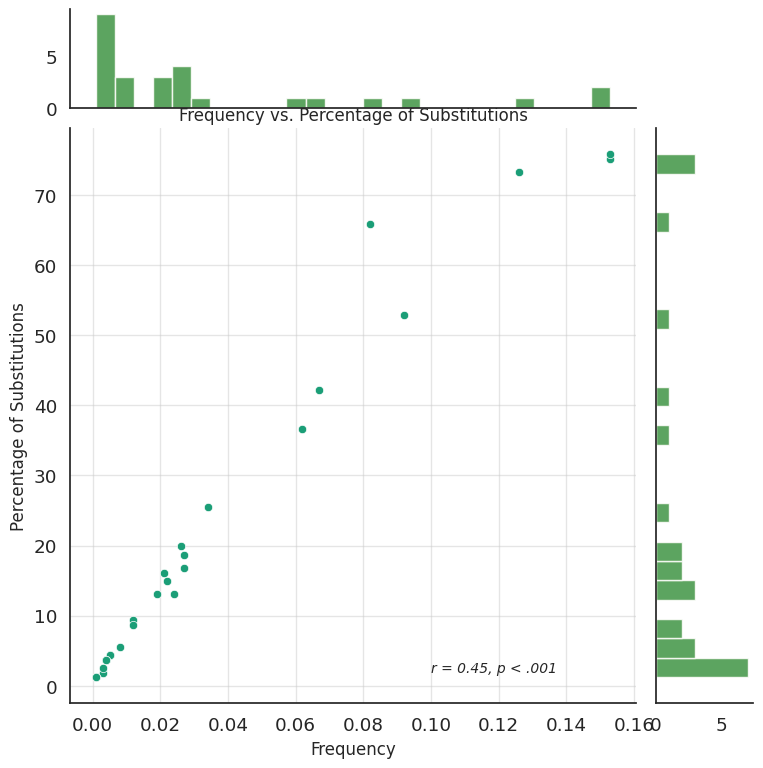

In [18]:
sns.set(style='white', font_scale=1.2)
sns.set_palette('Dark2')

g = sns.jointplot(x='Frequency', y='Percentage_substitutions', data=df, kind='scatter', height=8, ratio=5, space=0.2, marginal_ticks=True, marginal_kws=dict(bins=27))

g.ax_joint.annotate(f"beta = {g.ax_joint.collections[0].get_offsets()[0][1]:.2f}",
                     xy=(10, 50), size=12, fontstyle='italic', color='red')

g.set_axis_labels('Frequency', 'Percentage of Substitutions', fontsize=12)

plt.grid(True, alpha=0.5)
g.ax_joint.set_title('Frequency vs. Percentage of Substitutions', fontsize=12)
g.ax_joint.text(0.1, 2, 'r = 0.45, p < .001', fontstyle='italic', size=10)

g.ax_marg_x.hist(df['Frequency'], color='xkcd:muted green', alpha=0.8, bins=27)
g.ax_marg_y.hist(df['Percentage_substitutions'], color='xkcd:muted green', alpha=0.8, bins=27, orientation='horizontal')

plt.savefig('myplot.png')



Practice 3: Scatter with Custom Marginals

Scatter plot with manual marginal coloring
Green marginal histograms

**Practice 4**

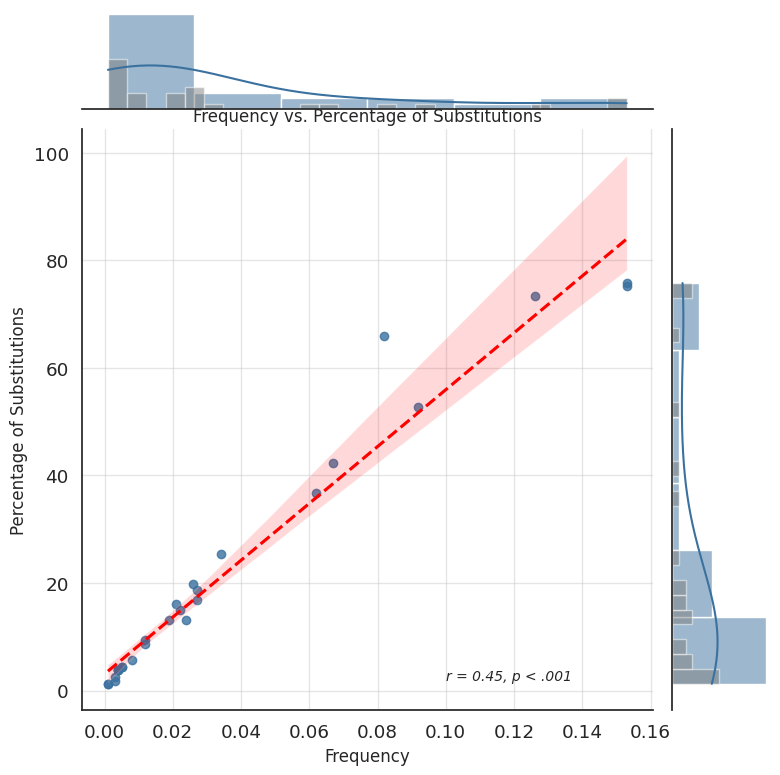

In [19]:
sns.set(style='white', font_scale=1.2)
sns.set_palette('Dark2')

g = sns.jointplot(x='Frequency', y='Percentage_substitutions', data=df, kind='reg',
                  height=8, ratio=5, color='xkcd:muted blue', line_kws={'linestyle': '--', 'color': 'red'})

g.ax_joint.annotate(f"beta = {g.ax_joint.collections[0].get_offsets()[0][1]:.2f}",
                     xy=(10, 50), size=12, fontstyle='italic', color='red')

g.set_axis_labels('Frequency', 'Percentage of Substitutions', fontsize=12)

plt.grid(True, alpha=0.5)
g.ax_joint.set_title('Frequency vs. Percentage of Substitutions', fontsize=12)
g.ax_joint.text(0.1, 2, 'r = 0.45, p < .001', fontstyle='italic', size=10)

g.ax_marg_x.hist(df['Frequency'], color='grey', alpha=0.5, bins=27)
g.ax_marg_y.hist(df['Percentage_substitutions'], color='grey', alpha=0.5, bins=27, orientation='horizontal')

plt.savefig('myplot.png')


Practice 4: Grey Marginal Styling

Grey marginal histograms with transparency
Consistent color scheme

**Practice 5**

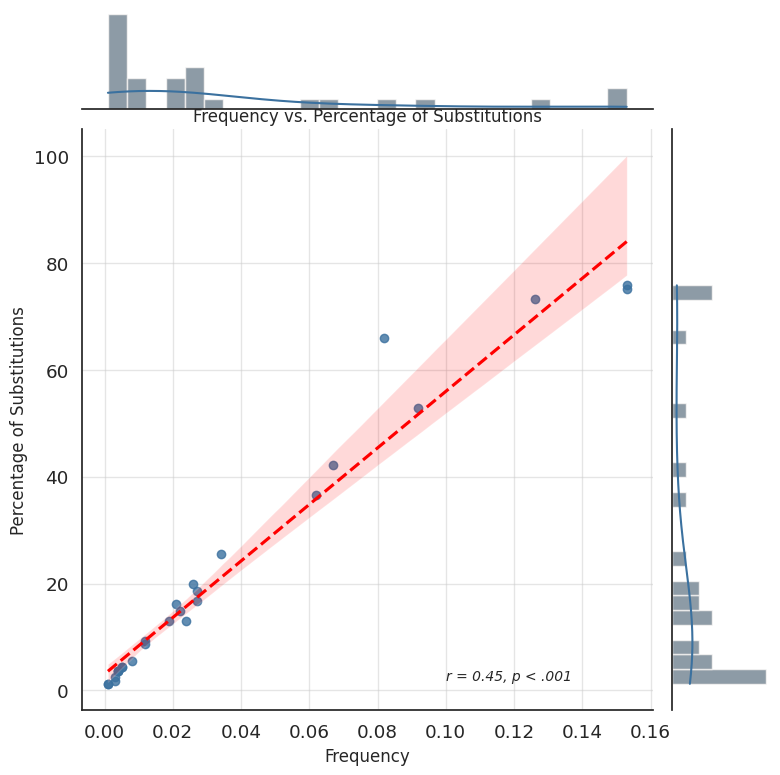

In [20]:
sns.set(style='white', font_scale=1.2)
sns.set_palette('Dark2')

g = sns.jointplot(x='Frequency', y='Percentage_substitutions', data=df, kind='reg',
                  height=8, ratio=5, color='xkcd:muted blue', marginal_kws=dict(bins=27), line_kws={'linestyle': '--', 'color': 'red'})

g.ax_joint.annotate(f"beta = {g.ax_joint.collections[0].get_offsets()[0][1]:.2f}",
                     xy=(10, 50), size=12, fontstyle='italic', color='red')

g.set_axis_labels('Frequency', 'Percentage of Substitutions', fontsize=12)

plt.grid(True, alpha=0.5)
g.ax_joint.set_title('Frequency vs. Percentage of Substitutions', fontsize=12)
g.ax_joint.text(0.1, 2, 'r = 0.45, p < .001', fontstyle='italic', size=10)

g.ax_marg_x.hist(df['Frequency'], color='grey', alpha=0.5, bins=27)
g.ax_marg_y.hist(df['Percentage_substitutions'], color='grey', alpha=0.5, bins=27, orientation='horizontal')

plt.savefig('myplot.png')

Practice 5: Combined Styling

Regression with custom grey marginals
Demonstration of component combination

**Practice 6**

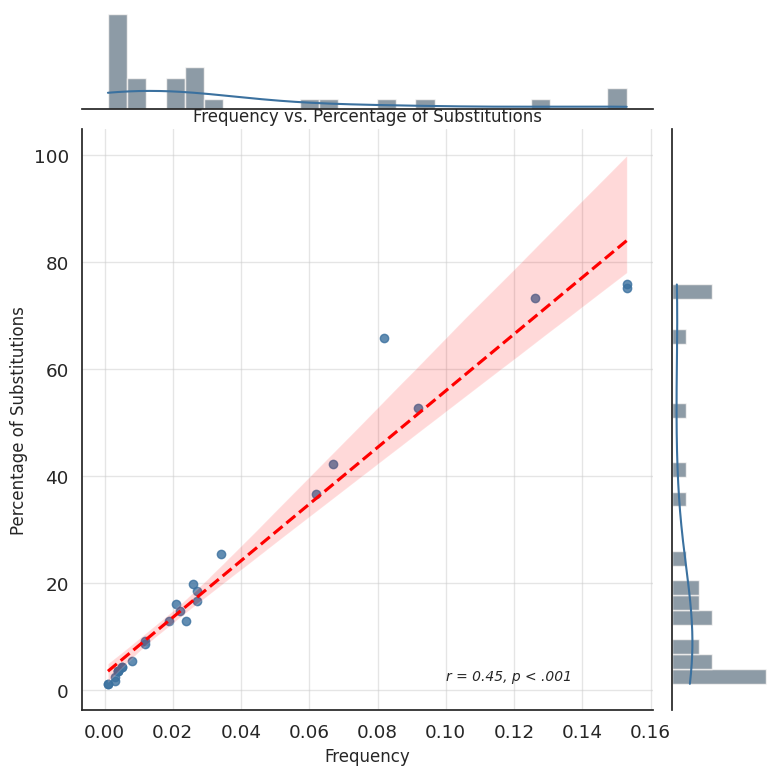

In [21]:
sns.set(style='white', font_scale=1.2)
sns.set_palette('Dark2')

g = sns.jointplot(x='Frequency', y='Percentage_substitutions', data=df, kind='reg',
                  height=8, ratio=5, color='xkcd:muted blue', marginal_kws=dict(bins=27), line_kws={'linestyle': '--', 'color': 'red'})

g.ax_joint.annotate(f"beta = {g.ax_joint.collections[0].get_offsets()[0][1]:.2f}",
                     xy=(10, 50), size=12, fontstyle='italic', color='red')

g.set_axis_labels('Frequency', 'Percentage of Substitutions', fontsize=12)

plt.grid(True, alpha=0.5)
g.ax_joint.set_title('Frequency vs. Percentage of Substitutions', fontsize=12)
g.ax_joint.text(0.1, 2, 'r = 0.45, p < .001', fontstyle='italic', size=10)

g.ax_marg_x.hist(df['Frequency'], color='grey', alpha=0.5, bins=27)
g.ax_marg_y.hist(df['Percentage_substitutions'], color='grey', alpha=0.5, bins=27, orientation='horizontal')

plt.savefig('myplot.png')

Practice 6: Reproducibility Test

Identical to Practice 5
Demonstrates code consistency

**Practice 7**

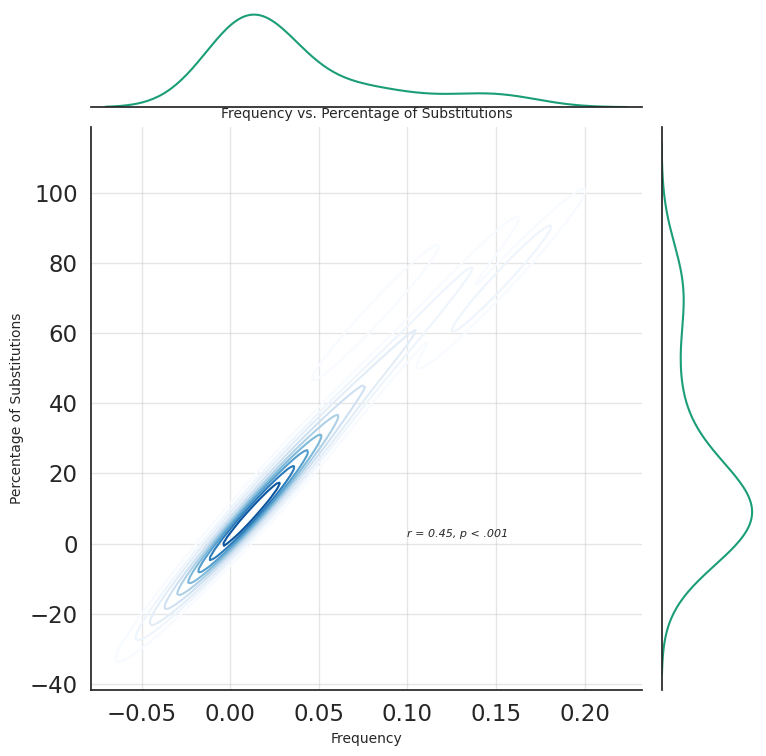

In [22]:
sns.set(style='white', font_scale=1.5)
sns.set_palette('Dark2')

g = sns.jointplot(x='Frequency', y='Percentage_substitutions', data=df, kind='kde',
                  height=8, ratio=5, cmap='Blues')

g.ax_joint.annotate(f"beta = {g.ax_joint.collections[0].get_offsets()[0][1]:.2f}",
                     xy=(10, 50), size=10, fontstyle='italic', color='red')

g.set_axis_labels('Frequency', 'Percentage of Substitutions', fontsize=10)

plt.grid(True, alpha=0.5)
g.ax_joint.set_title('Frequency vs. Percentage of Substitutions', fontsize=10)
g.ax_joint.text(0.1, 2, 'r = 0.45, p < .001', fontstyle='italic', size=8)

plt.show()


Practice 7: KDE Plot

Kernel Density Estimation visualization
Smooth density contours in blue

**Practice 8**

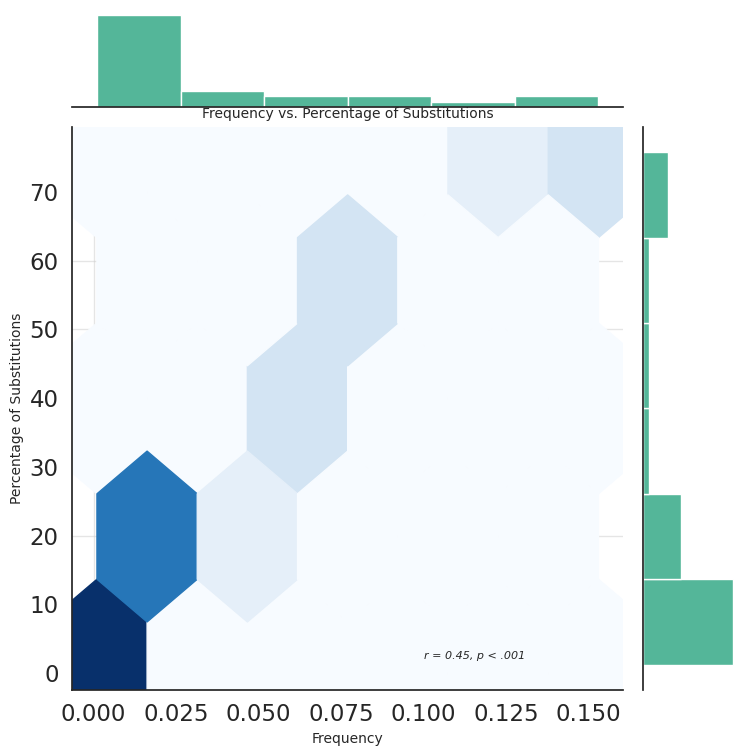

In [23]:
sns.set(style='white', font_scale=1.5)
sns.set_palette('Dark2')

g = sns.jointplot(x='Frequency', y='Percentage_substitutions', data=df, kind='hex',
                  height=8, ratio=5, cmap='Blues')

g.ax_joint.annotate(f"beta = {g.ax_joint.collections[0].get_offsets()[0][1]:.2f}",
                     xy=(10, 50), size=10, fontstyle='italic', color='red')

g.set_axis_labels('Frequency', 'Percentage of Substitutions', fontsize=10)

plt.grid(True, alpha=0.5)
g.ax_joint.set_title('Frequency vs. Percentage of Substitutions', fontsize=10)
g.ax_joint.text(0.1, 2, 'r = 0.45, p < .001', fontstyle='italic', size=8)

plt.show()


This line of code calculates the correlation matrix of the numerical columns in the DataFrame df, rounds the correlation values to two decimal places for better presentation, and stores this matrix in a variable called corr.

Practice 8: Hexagonal Binning

Hexagonal bins for density representation
Color intensity shows point concentration

In [24]:
print(df.dtypes)


protein                      object
Frequency                   float64
Percentage_substitutions    float64
Substitutions_base          float64
dtype: object


In older pandas versions, .corr() silently ignored non-numeric columns like strings.
Newer versions are stricter and throw a ValueError if non-numeric data (e.g., "3'UTR") is present, so select_dtypes() must be used to filter numeric columns first.

In [25]:
# corr = df.corr().round(2) #ValueError: could not convert string to float: "3'UTR" # it run in older version but not now

# Only keep numeric columns for correlation
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr().round(2)


In [26]:
corr

,Frequency,Percentage_substitutions,Substitutions_base
Frequency,1.00,0.98,0.07
Percentage_substitutions,0.98,1.00,0.13
Substitutions_base,0.07,0.13,1.00


Result explaination::


**Frequency vs. Frequency (1.00):** This is the correlation of a variable with itself, which is always 1 (perfect positive correlation). \\
**Frequency vs. Percentage_substitutions (0.98):** This indicates a very strong positive correlation between 'Frequency' and 'Percentage_substitutions'. As 'Frequency' increases, 'Percentage_substitutions' also tends to increase strongly. \\
**Frequency vs. Substitutions_base (0.07):** This shows a very weak positive correlation between 'Frequency' and 'Substitutions_base'. There's little to no linear relationship between these two variables. \\
Percentage_substitutions vs. Percentage_substitutions (1.00): Again, the correlation of a variable with itself is 1. \\
**Percentage_substitutions vs. Substitutions_base (0.13):** This indicates a weak positive correlation between 'Percentage_substitutions' and 'Substitutions_base'. There's a slight tendency for 'Substitutions_base' to increase as 'Percentage_substitutions' increases. \\
**Substitutions_base vs. Substitutions_base (1.00):** Correlation of a variable with itself is 1.

**Practice 9**

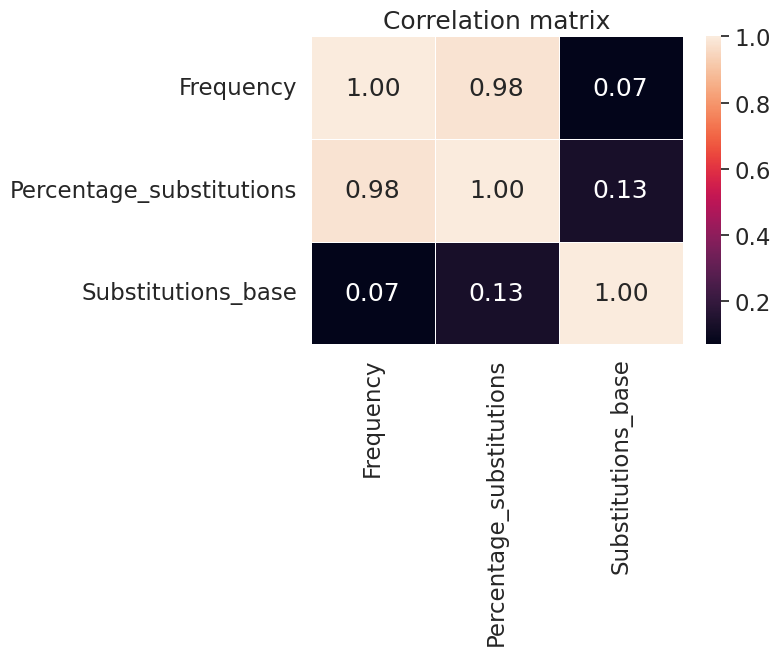

In [27]:
plt.figure(figsize=(6,4), dpi =100)
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.title('Correlation matrix')
plt.show()

Correlation Heatmaps (Practices 9-10)
Practice 9: Basic Correlation Heatmap

Simple correlation matrix with numerical annotations
Compact size with high DPI

**Practice 10**

Text(0.5, 1.0, 'Correlation matrix')

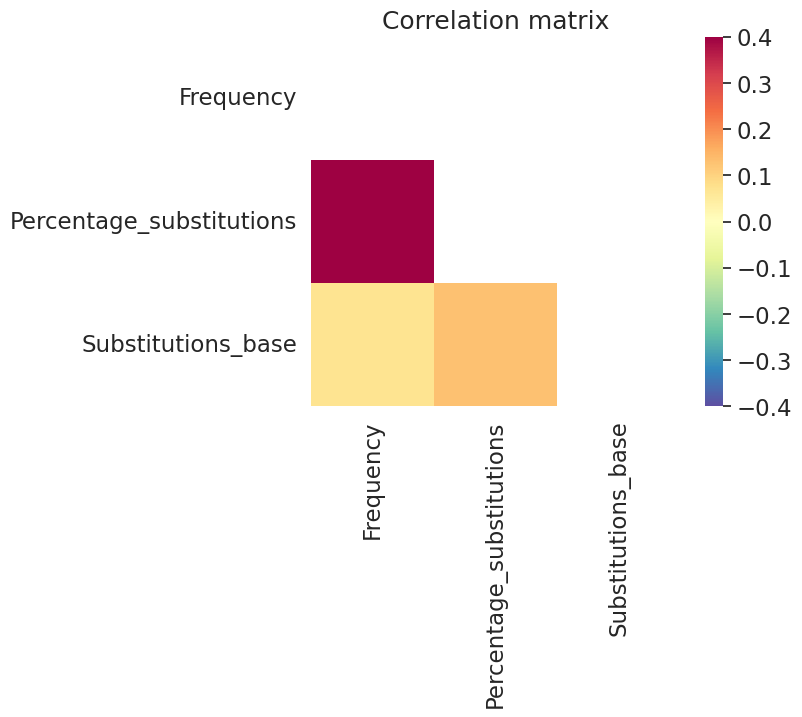

In [28]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

Practice 10: Masked Correlation Heatmap

Upper triangle masked
Spectral color scheme (reverse)
Fixed color scale range

**Practice 11**

<Figure size 1200x1200 with 0 Axes>

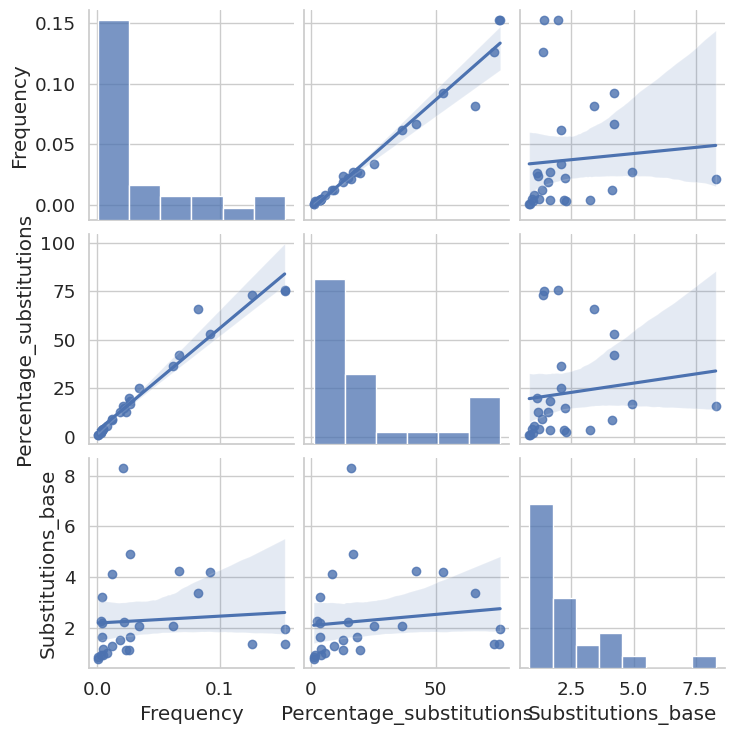

In [43]:
plt.figure(figsize=(12,12), dpi =100)
sns.pairplot(df, kind="reg")


Pair Plots (Practices 11-13, 17)
Practice 11: Basic Pair Plot

All numeric columns included
Regression lines for each pair

**Practice 12**

<Figure size 1200x800 with 0 Axes>

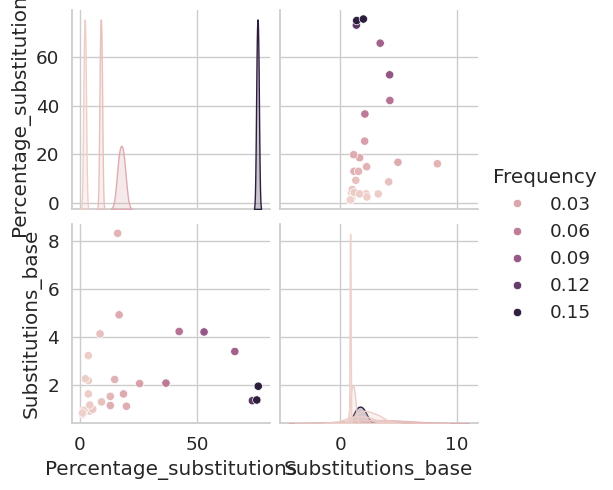

In [45]:
plt.figure(figsize=(12,8), dpi =100)
sns.pairplot(df[['Frequency', 'Percentage_substitutions', 'Substitutions_base']], hue='Frequency')

Practice 12: Hue-based Pair Plot

Color-coded by Frequency values
Selected variables only

**Practice 13**

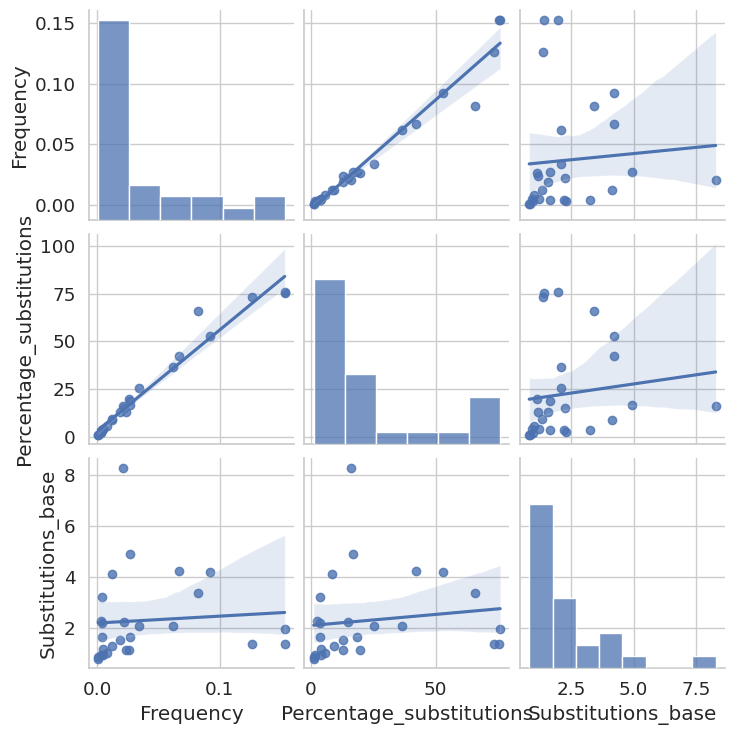

In [48]:

sns.pairplot(df[['Frequency','Percentage_substitutions','Substitutions_base']], kind="reg")

Practice 13: Large Pair Plot

Enlarged figure size (14x8)
Focused on three key variables

**Practice 14**

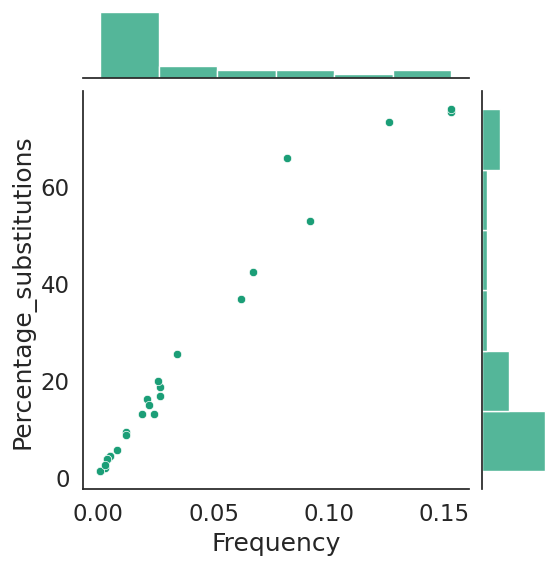

In [32]:
sns.jointplot(x='Frequency', y='Percentage_substitutions', data=df)

Simple Joint Plots (Practices 14-16)
Practice 14: Default Joint Plot

Basic jointplot without regression
Standard marginal histograms

**Practice 15**

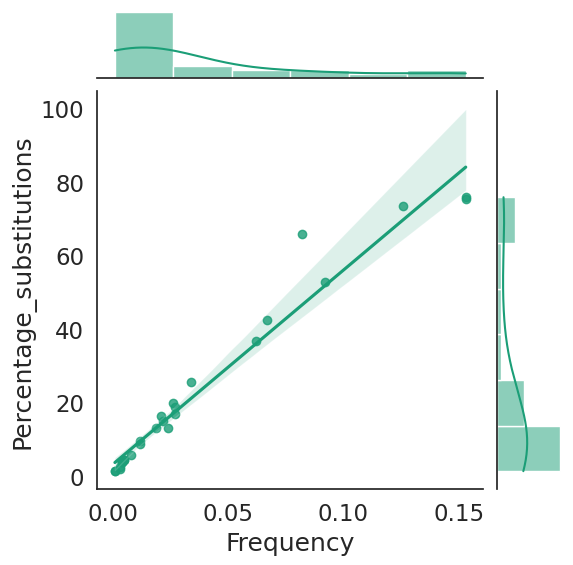

In [33]:
sns.jointplot(x='Frequency', y='Percentage_substitutions', data=df, kind='reg')

Practice 15: Default Regression Joint Plot

Basic regression style
Confidence interval shown

**Practice 16**

In [34]:
sns.set(style='whitegrid', font_scale=1.2)

g = sns.jointplot(x='Frequency', y='Percentage_substitutions', data=df, kind='reg',
                  height=10, ratio=5, color='xkcd:muted blue')

g.ax_joint.annotate(f"beta = {g.ax_joint.collections[0].get_offsets()[0][1]:.2f}",
                     xy=(15, 70), size=16, fontstyle='italic', color='red')

g.ax_joint.text(14, 40, 'r = 0.45, p < .001', fontstyle='italic', size=16)

g.set_axis_labels('Frequency', 'Percentage of Substitutions', fontsize=16)

plt.savefig('rez.png')

Practice 16: Detailed Joint Plot

Large size (height=10)
Custom annotations and increased font scale

**Practice 17**

<Figure size 1400x800 with 0 Axes>

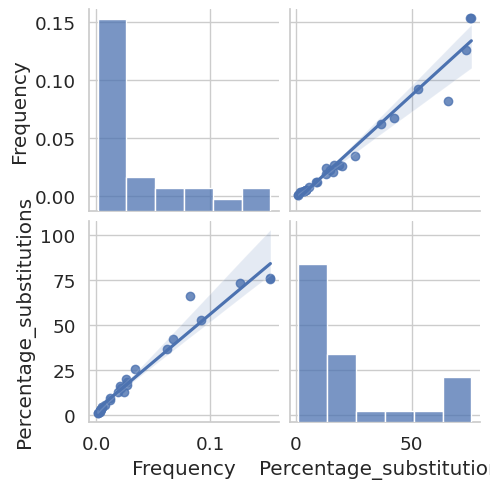

In [35]:
plt.figure(figsize=(14,8))
sns.pairplot(df[['Frequency','Percentage_substitutions']], kind="reg")

**Practice 18**

Text(0.5, 1.0, 'Frequency vs. Percentage_substitutions')

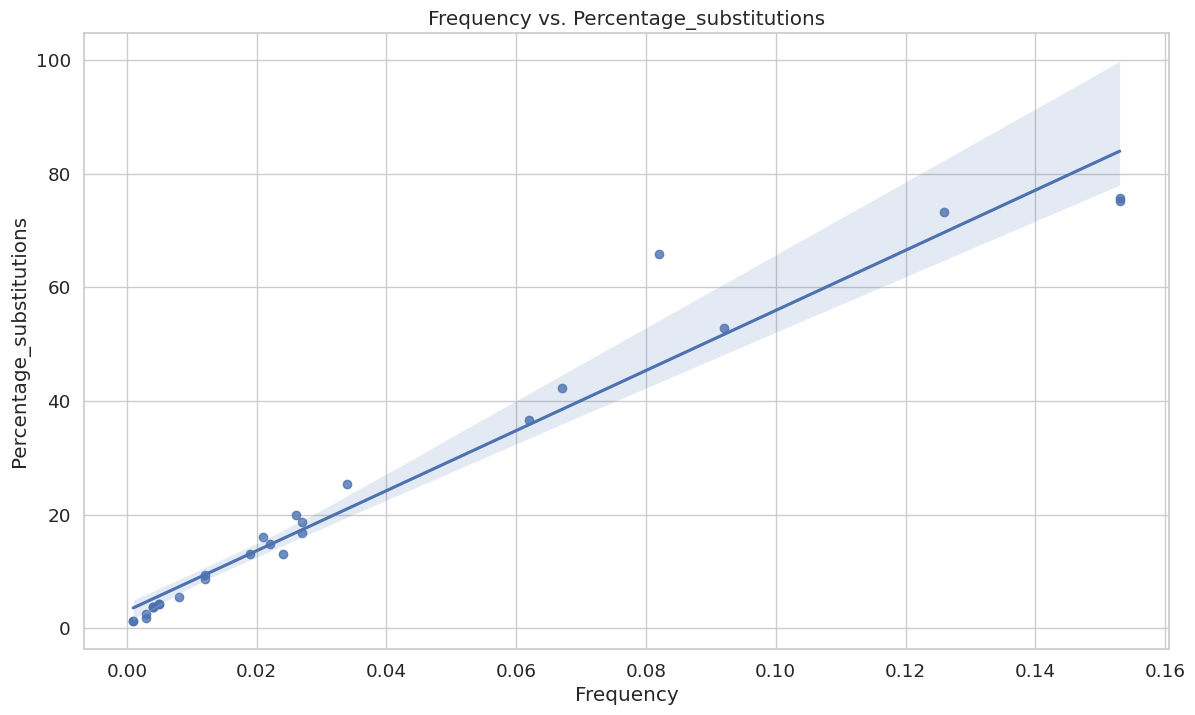

In [36]:
plt.figure(figsize=(14,8))
sns.regplot(x=df["Frequency"], y=df["Percentage_substitutions"])
plt.title('Frequency vs. Percentage_substitutions')

Practice 18: Simple Regression Plot

Frequency vs. Percentage_substitutions
Large figure for clarity

**Practice 19**

Text(0.5, 1.0, 'Frequency vs. Substitutions_base')

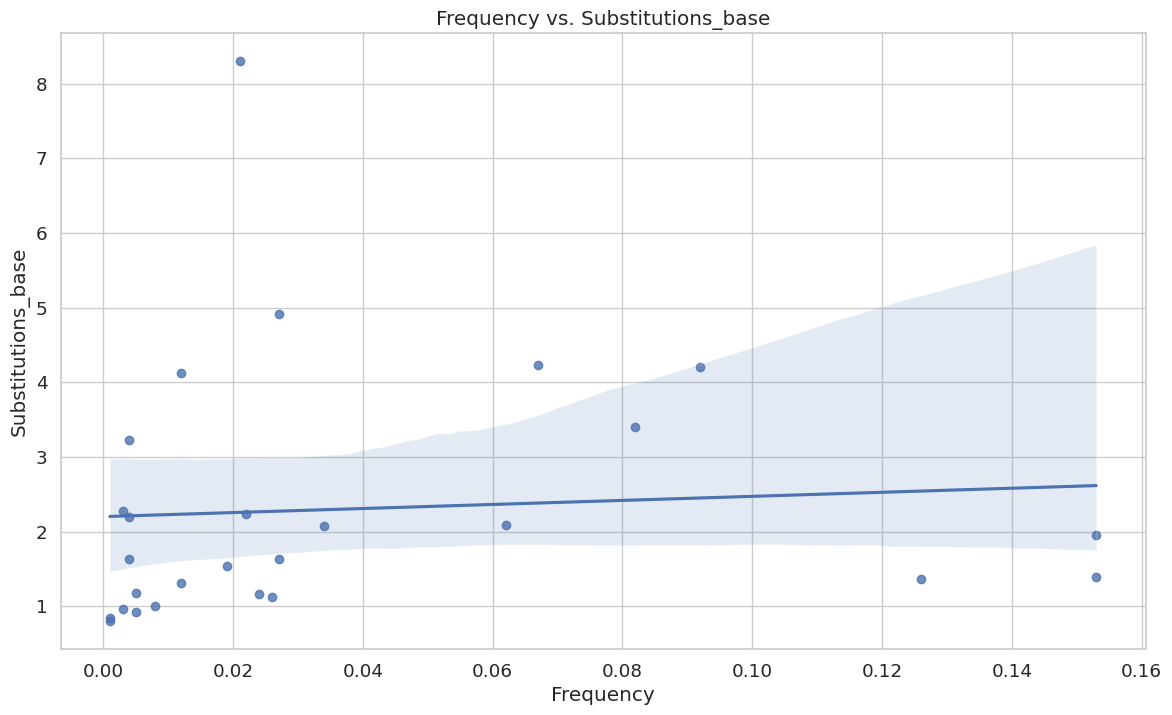

In [37]:
plt.figure(figsize=(14,8))
sns.regplot(x=df["Frequency"], y=df["Substitutions_base"])
plt.title('Frequency vs. Substitutions_base')

Practice 19: Alternative Regression Plot

Frequency vs. Substitutions_base
Exploring weak correlation

**Practice 20**

<Figure size 1000x700 with 0 Axes>

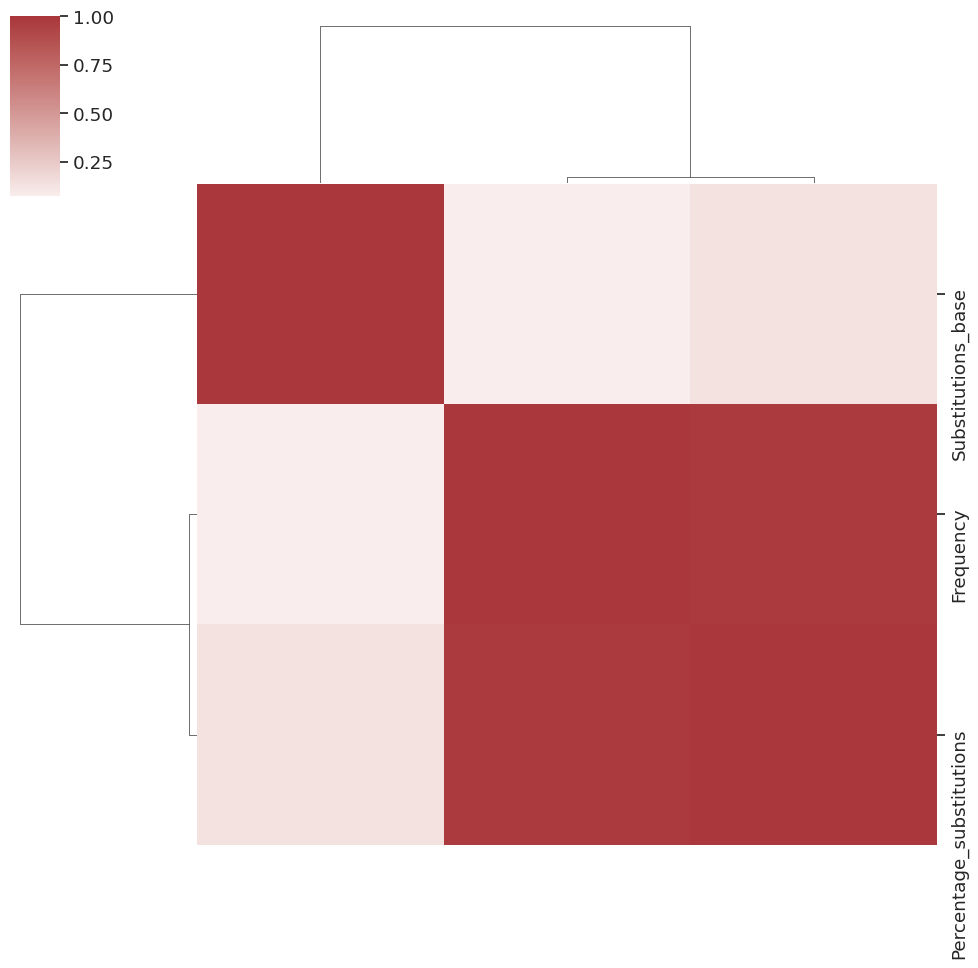

In [38]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10,7))
sns.clustermap(numeric_df.corr().round(2), xticklabels=False, cmap='vlag', center=0)


Advanced Visualization (Practice 20)
Practice 20: Cluster Heatmap

Hierarchical clustering of correlation matrix
Dendrogram visualization
Centered color scale